In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
series = pd.read_csv("daily-total-female-births.csv")
series

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [4]:
var_col = "Births"
data = "Date"
df = pd.read_csv("daily-total-female-births.csv", index_col = date_col, parse_dates = True)
df

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


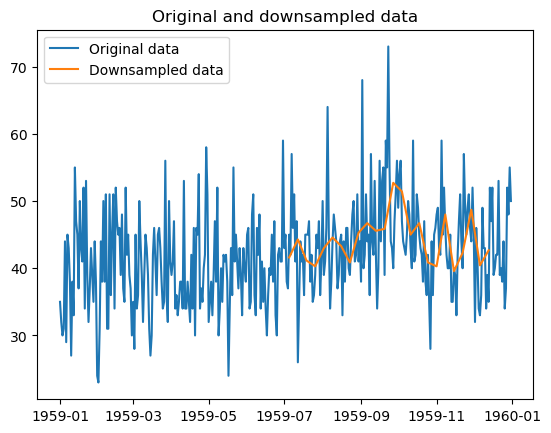

In [5]:
#downsampling
downsampling_freq = "W"
ds_start_date = "1959-07-01"
ds_end_date = "1959-12-09"
ds_subset = df[ds_start_date:ds_end_date]
df_downsample = ds_subset.resample(downsampling_freq).mean().copy()

plt.plot(df.index, df[var_col], label = "Original data")
plt.plot(df_downsample.index, df_downsample[var_col], label = "Downsampled data")
plt.legend()
plt.title("Original and downsampled data")
plt.show()

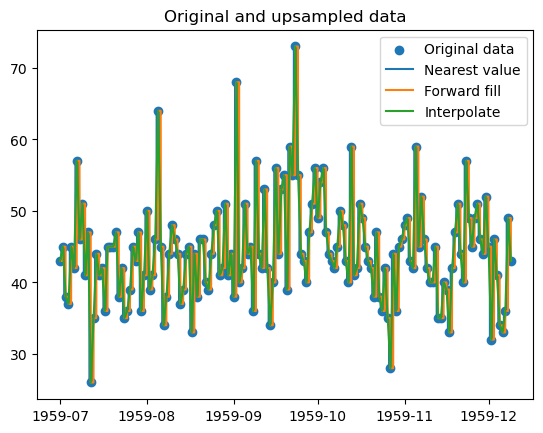

In [6]:
#upsampling
upsampling_freq = "H"
us_start_date = "1959-07-01"
us_end_date = "1959-12-09"

df_subset = df[us_start_date:us_end_date]
df_upsample = df_subset.resample(upsample_freq).asfreq()

df_upsample["nearest_value"] = df_subset.resample(upsample_freq).fillna("nearest")
df_upsample["forward_fill"] = df_subset.resample(upsample_freq).ffill()
df_upsample["Interpolate"] = df_subset.resample(upsample_freq).interpolate()

plt.scatter(df_upsample.index, df_upsample[var_col], label = "Original data")
plt.plot(df_upsample.index, df_upsample["nearest_value"], label= "Nearest value")
plt.plot(df_upsample.index, df_upsample["forward_fill"], label = "Forward fill")
plt.plot(df_upsample.index, df_upsample["Interpolate"], label = "Interpolate")
plt.legend()
plt.title("Original and upsampled data")
plt.show()
                                                                        
